# Workfile

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import utils.visualization_tb as vi
import utils.mining_data_tb as md

import warnings

warnings.filterwarnings("ignore")
sns.set_theme()

In [2]:
### Train data
train = pd.read_csv("data/train.csv", index_col = 0)
train_data, train_target = train.drop("SalePrice", axis = 1), train.loc[:, "SalePrice"]

### Test data
test_data = pd.read_csv("data/test.csv", index_col = 0)
# Ids to differentiate test data from train data
ids = test_data.index

# Now let's join the data
dataset = pd.concat([train_data, test_data], axis = 0)
dataset = md.ready_to_use(dataset)

# Finally, I split the data again between train data (to train the model)
# and test data (for the Kaggle submission)
train_data = dataset.drop(ids)
test_data = dataset.loc[ids, :]

# Ridge Regression

Now, let's try with some regularization.

For that purpose, I will test different levels of alpha to see if more restricted models lead to better generalization.

Additionally, I will use scale the data as regularized models are sensitive to different scales. I'll be using MinMaxScaler as it sets the values between 0 and 1.

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [30]:
seed = 42
scaler = MinMaxScaler()

# Target and independent variables
X = np.array(train_data)
X = scaler.fit_transform(X)
y = np.array(train_target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = seed)

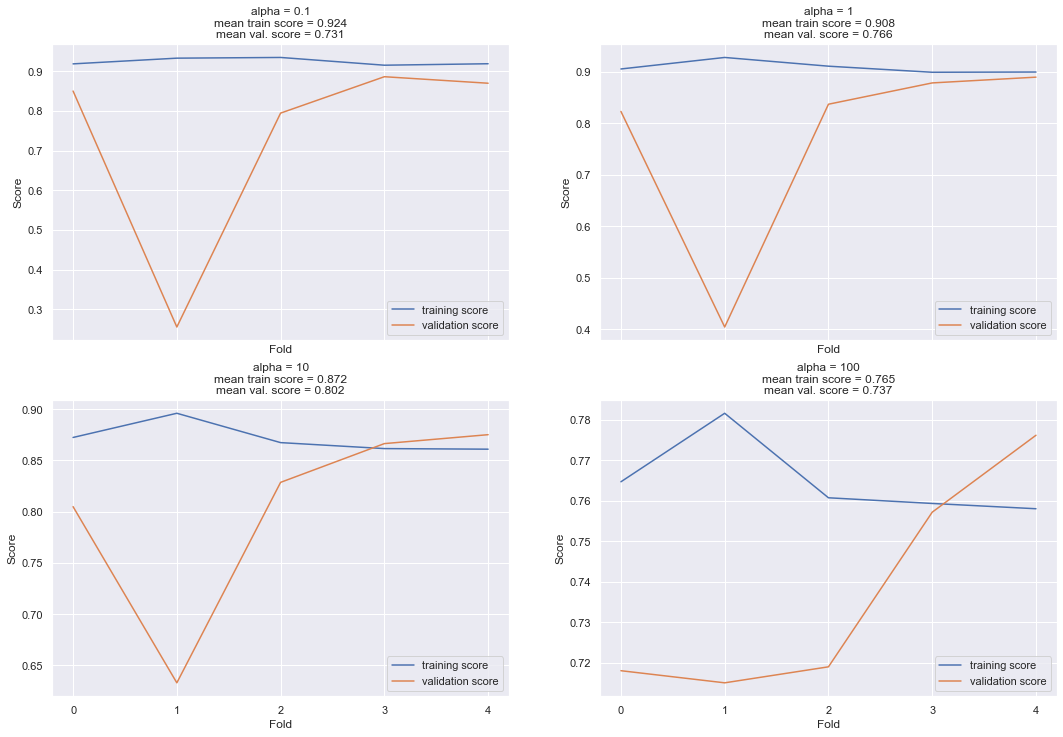

In [33]:
# Regularization
alphas = [0.1, 1, 10, 100]
folds = 5

fig, axes = plt.subplots(2, 2, figsize = (18, 12), sharex = True)

for ind, alpha in enumerate(alphas):
    # To plot on the second row
    y_axis = 0

    # To plot on the second row
    if ind > 1:
        y_axis += 1
        ind = ind - 2
    
    # Model
    ridge_ = Ridge(alpha = alpha)

    # Training
    results = cross_validate(ridge_, X_train, y_train, cv = folds, n_jobs = -1, return_train_score = True)

    # Plot
    axes[y_axis][ind].set_title(f"alpha = {alpha}\nmean train score = {round(np.mean(results['train_score']), 3)}\nmean val. score = {round(np.mean(results['test_score']), 3)}")
    axes[y_axis][ind].plot(results["train_score"], label = "training score")
    axes[y_axis][ind].plot(results["test_score"], label = "validation score")

    axes[y_axis][ind].set_xlabel("Fold")
    axes[y_axis][ind].set_ylabel("Score")
    axes[y_axis][ind].set_xticks(range(0, folds))
    axes[y_axis][ind].legend()

plt.show()

Well, it seems like alpha = 10 offers the best results, although still overfitting for 3 of the folds and performing very poorly in one of them (although much better than Linear Regression).

Let's try this model too with polynomial features. The regularization will get the regression back on track so it will definitely improve results compared to Linear Regression with Polynomial Features.

## Polynomial Features

In [17]:
from sklearn.preprocessing import PolynomialFeatures

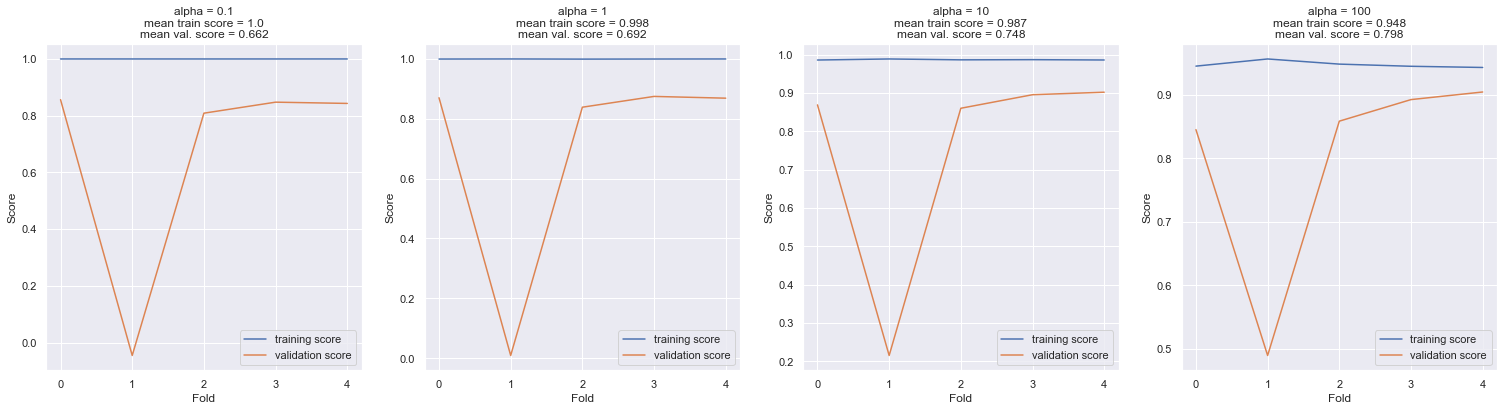

In [18]:
X = np.array(train_data)

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

X_scaled = scaler.fit_transform(X_poly)

y = np.array(train_target)

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, random_state = seed)

# Regularization
alphas = [0.1, 1, 10, 100]

fig, axes = plt.subplots(1, 4, figsize = (26, 6), sharex = True)

for ind, alpha in enumerate(alphas):
    # Model
    ridge_ = Ridge(alpha = alpha)

    # Training
    results = cross_validate(ridge_, X_train2, y_train2, cv = 5, n_jobs = -1, return_train_score = True)

    # Plot
    axes[ind].set_title(f"alpha = {alpha}\nmean train score = {round(np.mean(results['train_score']), 3)}\nmean val. score = {round(np.mean(results['test_score']), 3)}")
    axes[ind].plot(results["train_score"], label = "training score")
    axes[ind].plot(results["test_score"], label = "validation score")

    axes[ind].set_xlabel("Fold")
    axes[ind].set_ylabel("Score")
    axes[ind].set_xticks(range(0, 5))
    axes[ind].legend()

    # Show results
    # print(f"alpha = {alpha}")
    # print(f"Train scores(mean = {np.mean(results['train_score'])}):\n{results['train_score']}")
    # print(f"Validation scores(mean = {np.mean(results['test_score'])}):\n{results['test_score']}")
    # print("-" * 50)

plt.show()

Well, the results with polynomial features did improve a lot compared to the ones using Polynomial Features + LinearRegression. However, not enough to prefer the polynomial features over a "simple" linear regression.

# Lasso Regression

I'll test this one just with the "standard" features. Although it would probably improve even more the results of the polynomial features by getting many of the coefficients down to zero, it would still be a worse model than just using the variables we already have.

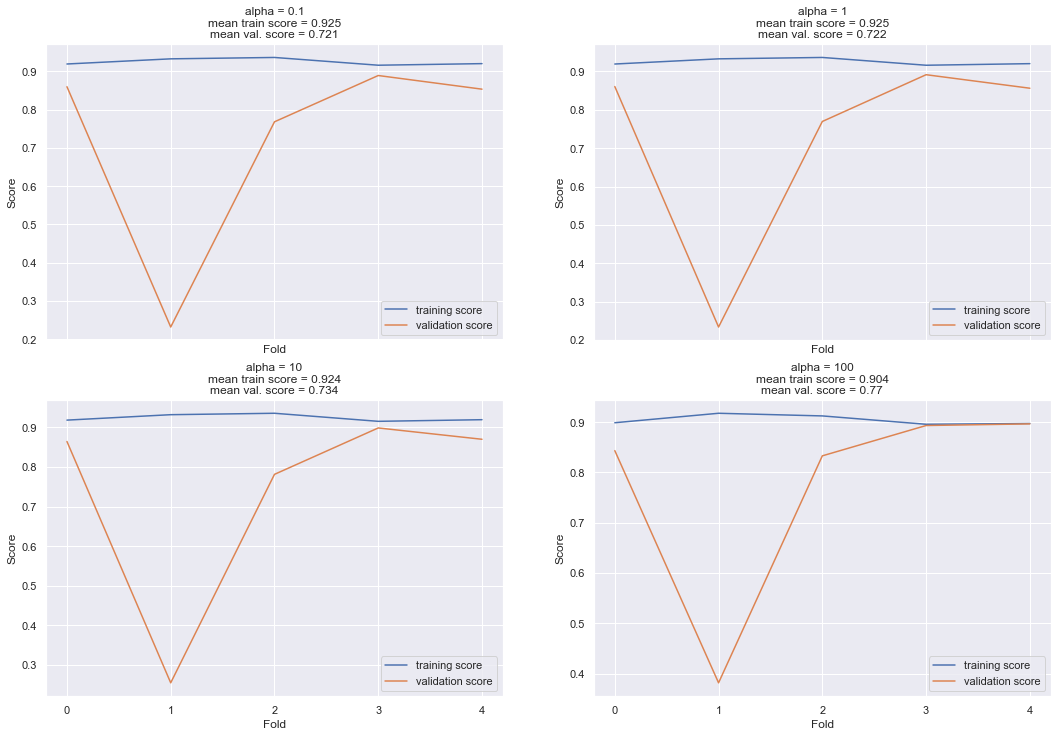

In [37]:
# Regularization
alphas = [0.1, 1, 10, 100]
folds = 5

fig, axes = plt.subplots(2, 2, figsize = (18, 12), sharex = True)

for ind, alpha in enumerate(alphas):
    # To plot on the second row
    y_axis = 0

    # To plot on the second row
    if ind > 1:
        y_axis += 1
        ind = ind - 2
    
    # Model
    lasso_ = Lasso(alpha = alpha)

    # Training
    results = cross_validate(lasso_, X_train, y_train, cv = 5, n_jobs = -1, return_train_score = True)

    # Plot
    axes[y_axis][ind].set_title(f"alpha = {alpha}\nmean train score = {round(np.mean(results['train_score']), 3)}\nmean val. score = {round(np.mean(results['test_score']), 3)}")
    axes[y_axis][ind].plot(results["train_score"], label = "training score")
    axes[y_axis][ind].plot(results["test_score"], label = "validation score")

    axes[y_axis][ind].set_xlabel("Fold")
    axes[y_axis][ind].set_ylabel("Score")
    axes[y_axis][ind].set_xticks(range(0, folds))
    axes[y_axis][ind].legend()

plt.show()

In [ ]:
# Regularization
alphas = [1000, 10000, 100000, 1000000]
folds = 5

fig, axes = plt.subplots(2, 2, figsize = (18, 12), sharex = True)

for ind, alpha in enumerate(alphas):
    # To plot on the second row
    y_axis = 0

    # To plot on the second row
    if ind > 1:
        y_axis += 1
        ind = ind - 2
    
    # Model
    lasso_ = Lasso(alpha = alpha)

    # Training
    results = cross_validate(lasso_, X_train, y_train, cv = 5, n_jobs = -1, return_train_score = True)

    # Plot
    axes[y_axis][ind].set_title(f"alpha = {alpha}\nmean train score = {round(np.mean(results['train_score']), 3)}\nmean val. score = {round(np.mean(results['test_score']), 3)}")
    axes[y_axis][ind].plot(results["train_score"], label = "training score")
    axes[y_axis][ind].plot(results["test_score"], label = "validation score")

    axes[y_axis][ind].set_xlabel("Fold")
    axes[y_axis][ind].set_ylabel("Score")
    axes[y_axis][ind].set_xticks(range(0, folds))
    axes[y_axis][ind].legend()

plt.show()

Well, it seems like Ridge Regression with alpha = 10 is the model that delivers the best results. However, I want to check Lasso Regression with alpha = 10 too on the X_test, y_test.

# Last comparison: Ridge(alpha = 10) vs Lasso(alpha = 10)

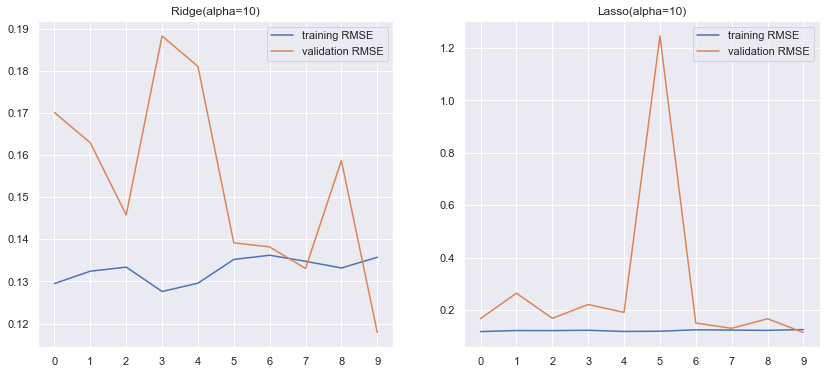

In [21]:
# Before checking out the models on the test set, I want to see the learning curves they both have
n_folds = 10
folds = KFold(n_splits = n_folds)
models = Ridge(alpha = 10), Lasso(alpha = 10)

fig, axes = plt.subplots(1, 2, figsize = (14, 6))

for ind, model in enumerate(models):
    train_rmsles = []
    val_rmsles = []

    for train, val in folds.split(X_train, y_train):
        x_t, y_t = X_train[train], y_train[train]
        x_v, y_v = X_train[val], y_train[val]

        model.fit(x_t, y_t)

        train_predictions = model.predict(x_t)
        val_predictions = model.predict(x_v)

        train_predictions = [x if x > 0 else 0 for x in train_predictions]
        val_predictions = [x if x > 0 else 0 for x in val_predictions]

        train_rmsle = np.sqrt(mean_squared_log_error(y_t, train_predictions))
        val_rmsle = np.sqrt(mean_squared_log_error(y_v, val_predictions))

        train_rmsles.append(train_rmsle)
        val_rmsles.append(val_rmsle)

    
    axes[ind].set_title(f"{str(model)}")
    axes[ind].plot(train_rmsles, label = "training RMSE")
    axes[ind].plot(val_rmsles, label = "validation RMSE")
    axes[ind].set_xticks(range(0, n_folds))
    axes[ind].legend()

plt.show()

## Testing the models

Let's see how the models behave with the test set

In [30]:
coeffs = {}

for model in models:
    model.fit(X_train, y_train)

    coeffs[str(model)] = model.coef_

    # Scores
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Root Mean Squared Error
    train_rmse = np.sqrt(mean_squared_error(y_train2, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test2, test_predictions))

    # Root Mean Squared Logarithmic Error
    train_rmsle = np.sqrt(mean_squared_log_error(y_train2, train_predictions))
    test_rmsle = np.sqrt(mean_squared_log_error(y_test2, test_predictions))

    print(f"Model: {str(model)}")
    print(f"\nTrain Score = {train_score}")
    print(f"Test Score = {test_score}")
    print(f"Train RMSE = {train_rmse}")
    print(f"Test RMSE = {test_rmse}")
    print(f"Train RMSLE = {train_rmsle}")
    print(f"Test RMSLE = {test_rmsle}")
    print("-" * 50)

Model: Ridge(alpha=10)

Train Score = 0.8689770548670314
Test Score = 0.8563988843687844
Train RMSE = 28204.585127777576
Test RMSE = 31717.033203901334
Train RMSLE = 0.13338088788757865
Test RMSLE = 0.16031781592461214
--------------------------------------------------
Model: Lasso(alpha=10)

Train Score = 0.9165524583230549
Test Score = 0.8942451494156152
Train RMSE = 22508.824282458816
Test RMSE = 27218.475565828136
Train RMSLE = 0.12273078167042863
Test RMSLE = 0.15224984062956984
--------------------------------------------------


In the end, it looks like the Lasso Regression generalizes slightly better.

I'll submit both models and see which one performs better on the test data.

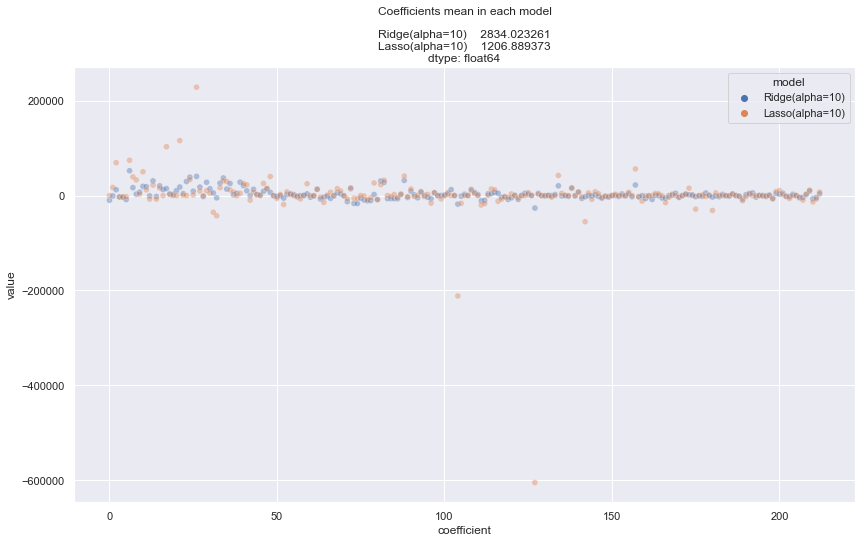

In [55]:
coeffs_df = pd.DataFrame(coeffs)
to_plot = coeffs_df.stack().reset_index()
to_plot.columns = ["coefficient", "model", "value"]

plt.figure(figsize = (14, 8))
sns.scatterplot(data = to_plot, x = "coefficient", y = "value", hue = "model", alpha = .4)
plt.title(f"Coefficients mean in each model\n\n{coeffs_df.mean()}")
plt.show()